# Preliminary Research

### Tensor
A tensor is just a container for numbers arranged in some dimensions (like a generalization of scalars, vectors, and matrices):
- Scalar (0D tensor): A single number (e.g., 5).
- Vector (1D tensor): A list of numbers (e.g., [1, 2, 3]).
- Matrix (2D tensor): Numbers in rows and columns (e.g., a 3×3 grid).
- Tensor (3D, 4D, …): Extends this idea into higher dimensions.

## EfficientNetV2

EfficientNetV2 is a family of models launched by Google in 2021, building on the original EfficientNet model family. 
- It consists of seven main models, differing in size, depth, and number of parameters:
    a) EfficientNetV2-S (Small)
      
    b) EfficientNetV2-M (Medium)
      
    c) EfficientNetV2-L (Large)
      
    d) EfficientNetV2-XL (Extra Large)
      
    e) EfficientNetV2-B0
      
    f) EfficientNetV2-B1
      
    g) EfficientNetV2-B2 
- EfficientNetV2-S is one of the EfficientNetV2 family models. The "S" stands for Small, meaning it’s optimized for speed and efficiency while still being accurate. It’s built using a combination of standard convolutions and MBConv/Fused-MBConv blocks.

### 1) Input Layer
- Accepts an image, usually a tensor of size (224*224, 3), but can scale up
- Adjusts pixel values into the first convolution

### 2) Stem Layer (Initial Convolution)

a) Batch Normalization
- It sclales down the feature maps generated after the first convolution to a uniform scale so that they have a mean of 0 and variance of 1
- It prevents exploding values and acts as a regularizer

b) SiLU (Swish Activation)
- Google proposed the Swish Activation function as an alternative to the popular ReLU activation function.
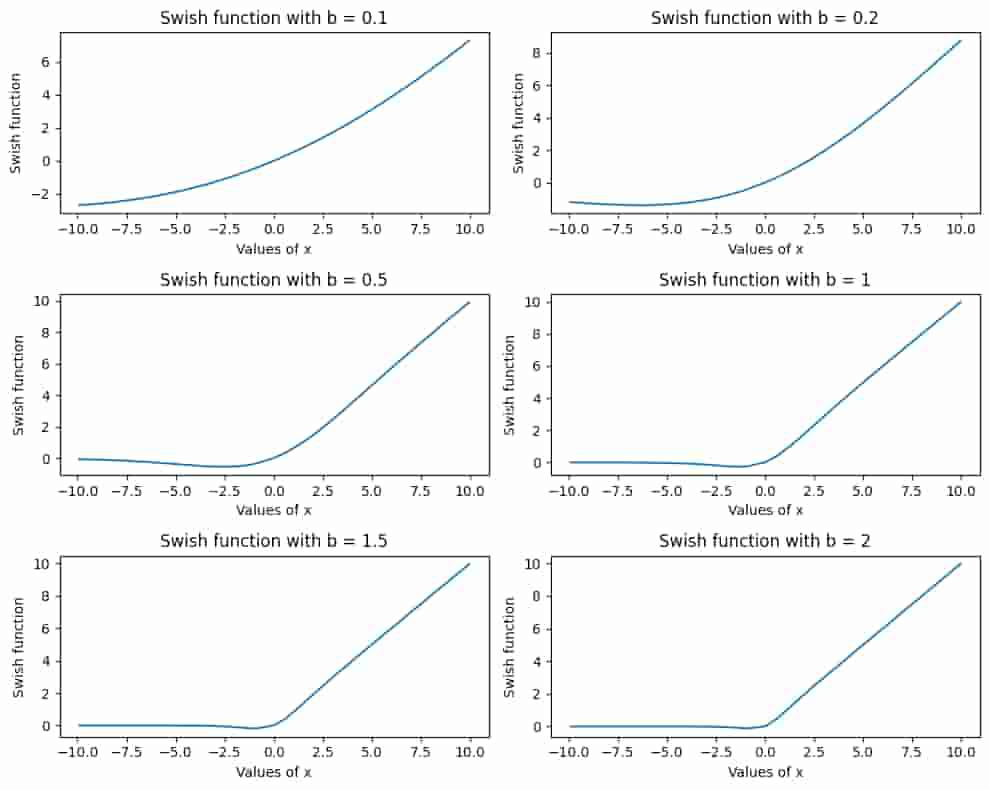
  
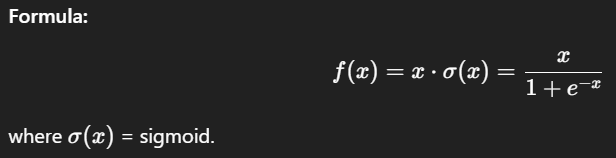

| Feature           | ReLU                                      | SiLU (Swish)                                      |
| ----------------- | ----------------------------------------- | ------------------------------------------------- |
| Negative values   | Sets all negative values = 0 (hard cut)   | Keeps small negative values (smooth curve)        |
| Gradient flow     | Can cause “dead neurons” (if stuck at <0) | Always has gradient (never totally flat)          |
| Smoothness        | Piecewise (sharp corner at 0)             | Smooth everywhere (helps optimization)            |
| Empirical results | Works well in shallow nets                | Works better in **deep nets** (like EfficientNet) |


### 3) Stacked Blocks

Instead of using only plain convolution layers, efficientNetV2 uses 2 kinds of blocks:
  
a) MBConv (Mobile Inverted Bottleneck Conv, used later)
- Originally used in MobileNetV2
  
*Expansion*
- 1 x 1 Convolution. It looks at one pixel at a time across all channels (no spatial neighborhood)
- takes input channels and expands them to more
- Expands feature space → allows learning richer combinations of features. Like taking basic building blocks (edges, textures) and recombining them into more abstract patterns (nucleus irregularity, chromatin structure).

*Depthwise Convolution*
- (3×3 or 5×5 Conv)
- Each input channel undergoes convolution seperately
- Useful for learning spatial patterns like edges and shapes

*Squeeze and Excitation Module*
- it is a lightweight way to let the network reweight channels adaptively
- Example: If nucleus texture is more important than cytoplasm, SE will boost those channels.

*Projection*
- 1x1 convolution again, but this time to reduce the number of channels into a smaller size. Keeps only the useful info

*Residual(Skip Connection)*
- If input and output shapes 
  
b) Fused-MBConv (used in earlier layers):
- This block is used to improve speed, especially on smaller images
